**Here are two different datasets of people and individual income .
task:  Predicting Income greater then $50K per year**

importing libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.shape
test_df.shape

(899, 14)

In [4]:
train_df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [5]:
test_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


Combining both test ans train datasets

In [6]:
train_df['label']='train'
test_df['label']='test'

combined_data_df=pd.concat([train_df,test_df])
combined_data_df.shape

(44856, 16)

In [7]:
combined_data_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,label
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1.0,train
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0.0,train
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1.0,train
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0.0,train
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0.0,train


In [8]:
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44856 entries, 0 to 898
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              44856 non-null  int64  
 1   workclass        42358 non-null  object 
 2   fnlwgt           44856 non-null  int64  
 3   education        44856 non-null  object 
 4   educational-num  44856 non-null  int64  
 5   marital-status   44856 non-null  object 
 6   occupation       42350 non-null  object 
 7   relationship     44856 non-null  object 
 8   race             44856 non-null  object 
 9   gender           44856 non-null  object 
 10  capital-gain     44856 non-null  int64  
 11  capital-loss     44856 non-null  int64  
 12  hours-per-week   44856 non-null  int64  
 13  native-country   44093 non-null  object 
 14  income_>50K      43957 non-null  float64
 15  label            44856 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.8+ MB


Check for null values and handling them

In [9]:
combined_data_df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K         899
label                 0
dtype: int64

Drop the missing values in all categorical variables except target variable

In [10]:
combined_data_df.dropna(subset=['workclass','occupation','native-country'],axis=0,inplace=True)
combined_data_df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income_>50K        899
label                0
dtype: int64

Data analysation and Data visualizing

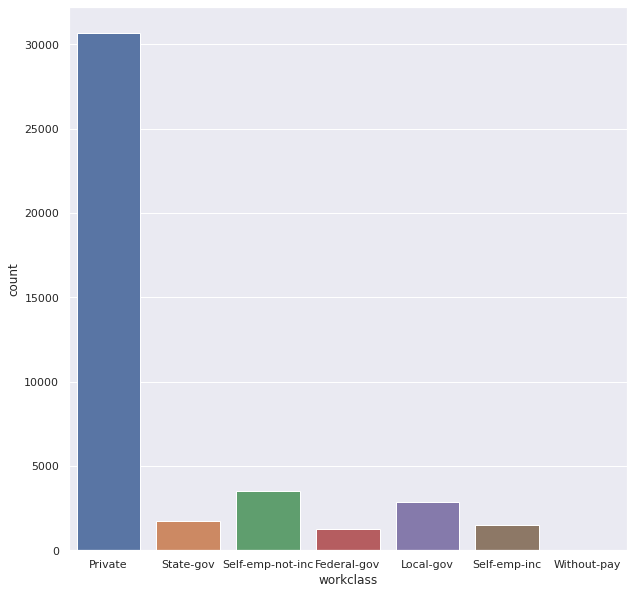

In [11]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,10))
sns.countplot(data= combined_data_df, x = combined_data_df['workclass'])

**From the graph we realize that**


*   most of the people are working in private sectors
*   without pay category is very less
Thus drop that category



In [12]:
combined_data_df.drop(combined_data_df.index[combined_data_df['workclass'] == 'Without-pay'], inplace=True)
combined_data_df.shape

(41606, 16)

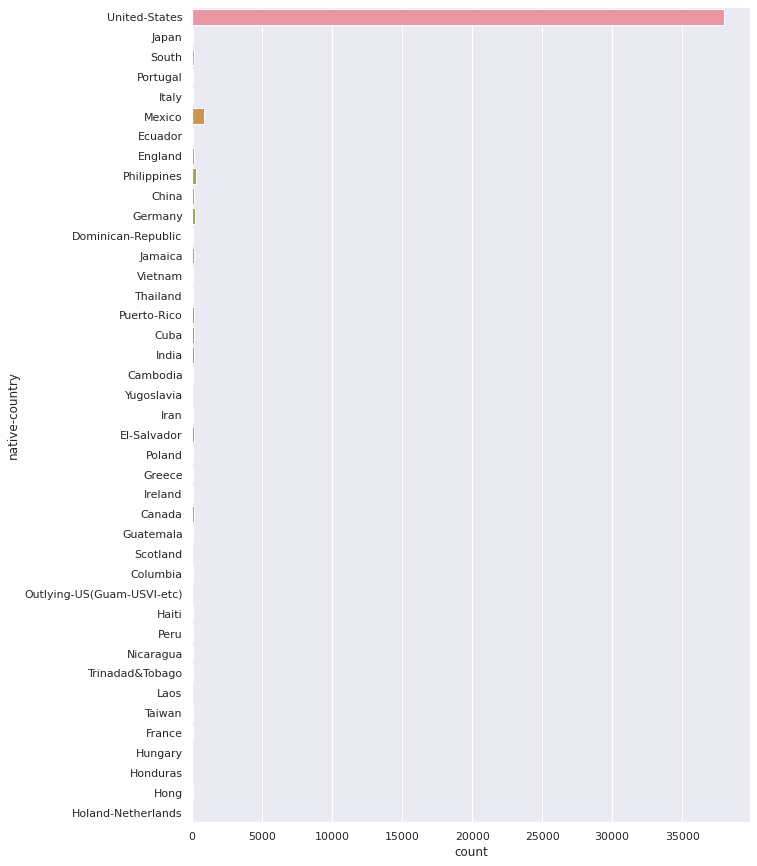

In [13]:
plt.figure(figsize=(10,15))
sns.countplot(data= combined_data_df, y = "native-country")

**From the graph it's clear that United States has highest count**

we replace them with United states and drop it since itt is useless

In [14]:
combined_data_df=combined_data_df[combined_data_df['native-country']=='United-States']
combined_data_df.shape

(37968, 16)

In [15]:
combined_data_df=combined_data_df.drop(columns='native-country',axis=1)
combined_data_df.shape

(37968, 15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

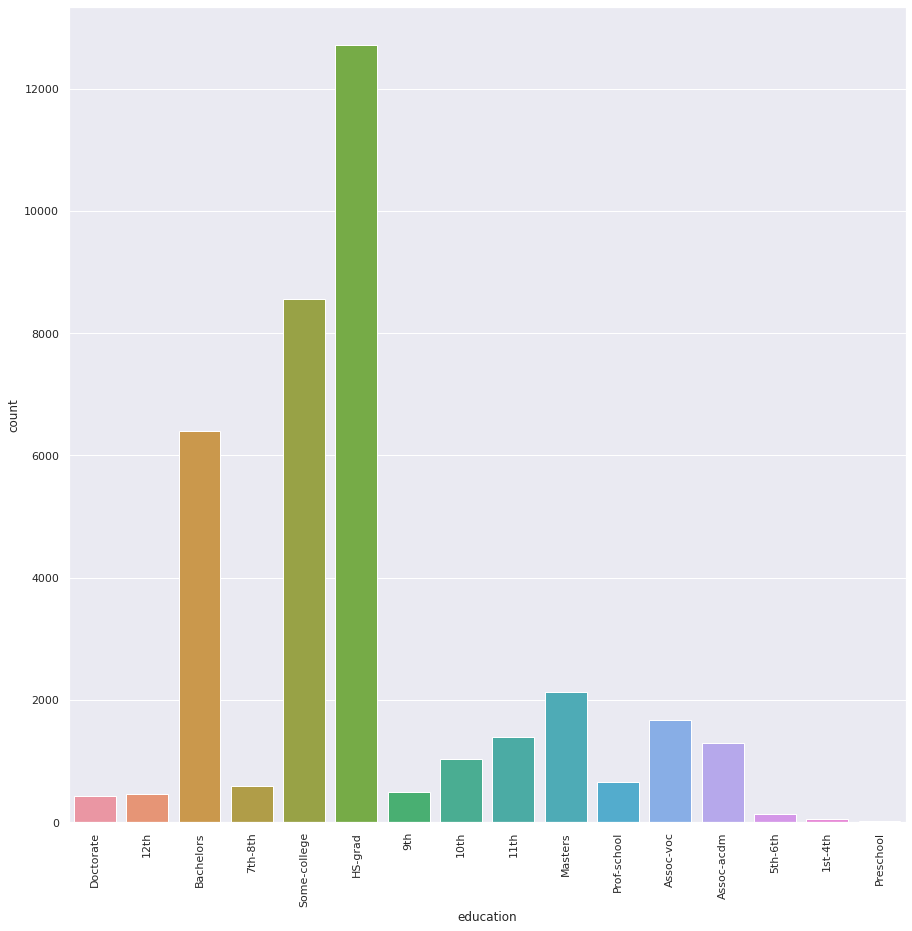

In [16]:
plt.figure(figsize=(15,15))
sns.countplot(data= combined_data_df, x = "education")
plt.xticks(rotation=90)

**From Graph**


*   Most of people have completed High Shool Education
*   let us combine 1-6 grade as elementary, 7-8 as Middle school and 9-12 as High school



In [17]:
#combineing and replacing#
combined_data_df['education'] = combined_data_df['education'].replace(['1st-4th','5th-6th'],'elementary-school')
combined_data_df['education'] = combined_data_df['education'].replace(['7th-8th'],'middle-school')
combined_data_df['education'] = combined_data_df['education'].replace(['9th','10th','11th','12th'],'high-school')
combined_data_df['education'] = combined_data_df['education'].replace(['Doctorate','Bachelors','Some-college','Masters','Prof-school','Assoc-voc','Assoc-acdm'],'postsecondary-education')


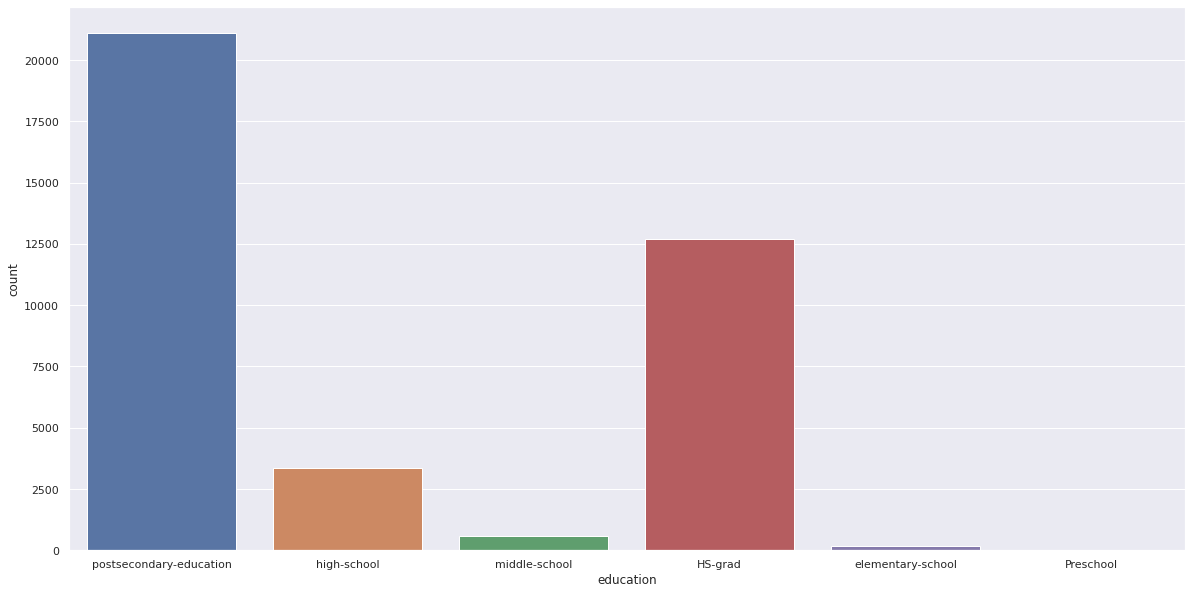

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data= combined_data_df, x = "education")

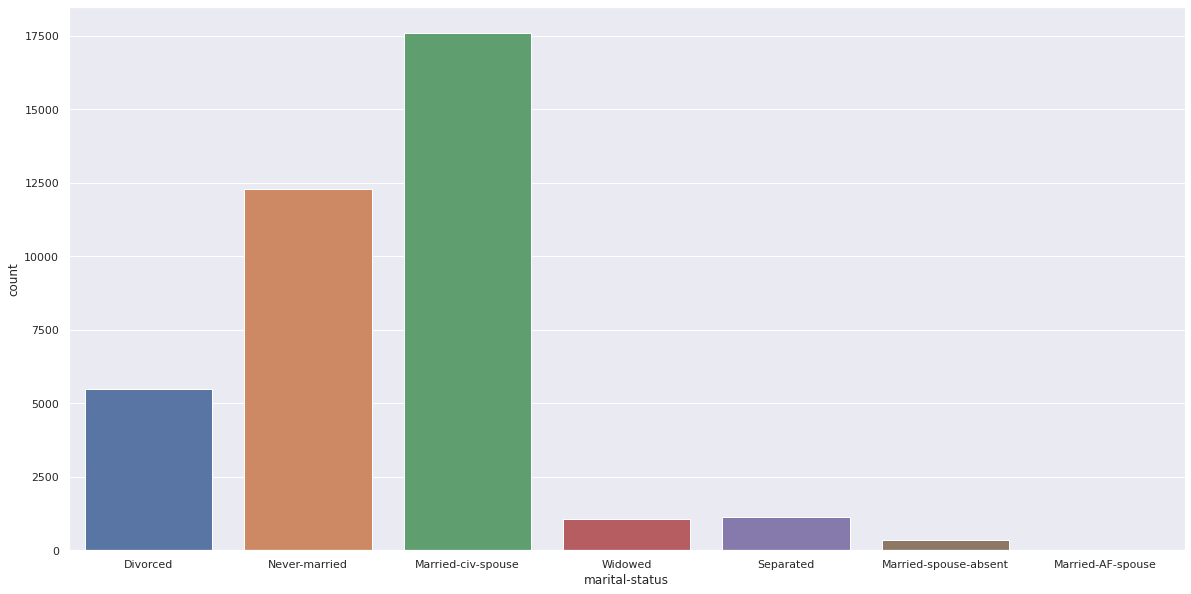

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data= combined_data_df, x = "marital-status")

Since,
divorced+never-married+widowed = single

married-civ-spouse+separated+married-spouse-absent+married-AF-spouse = married

let us replace and narrow it down to married and single only

In [20]:
combined_data_df['marital-status'] = combined_data_df['marital-status'].replace(['Divorced','Never-married','Widowed'],'single')
combined_data_df['marital-status'] = combined_data_df['marital-status'].replace(['Married-civ-spouse','Separated','Married-spouse-absent','Married-AF-spouse'],'married')

<Figure size 1440x720 with 0 Axes>

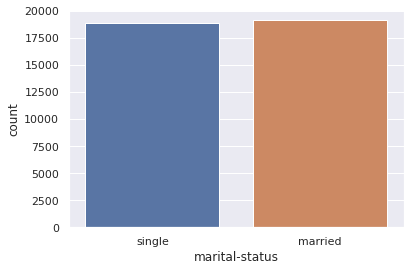

In [21]:
plt.figure(figsize=(20,10))
plt.figure()
sns.countplot(data= combined_data_df, x = "marital-status")

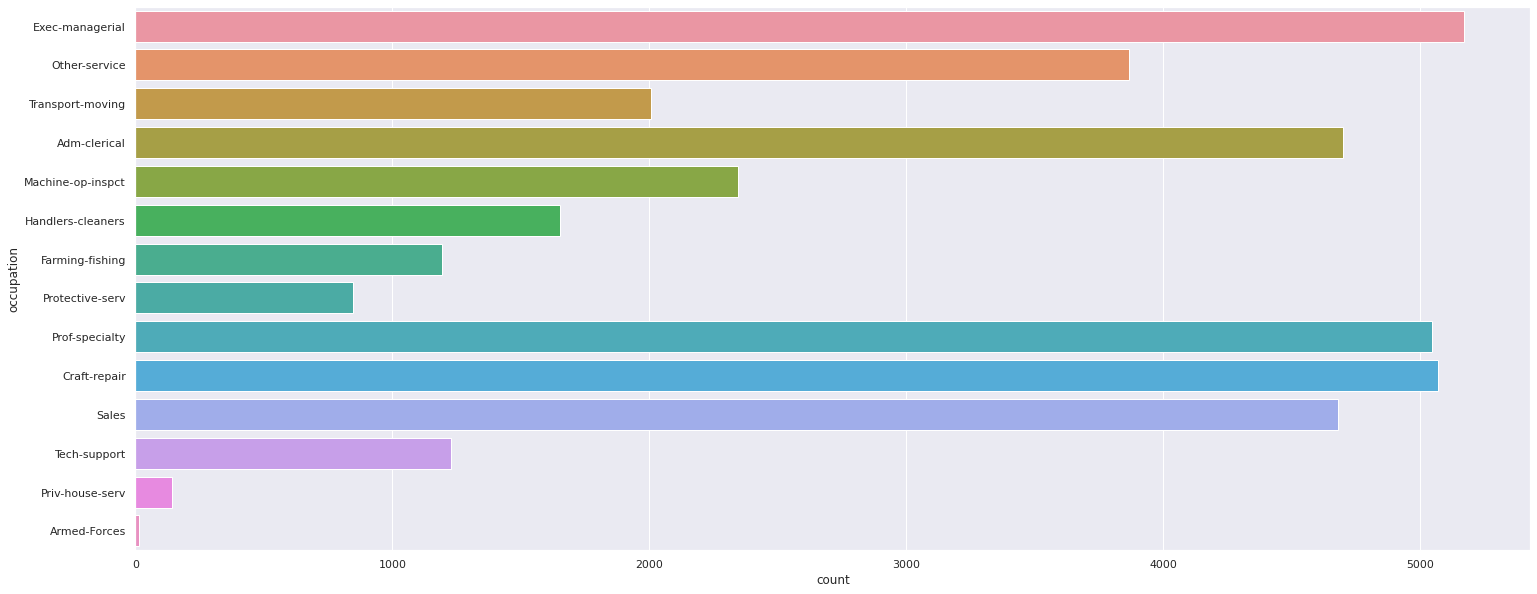

In [22]:

plt.figure(figsize=(25,10)) 
sns.countplot(data= combined_data_df, y = "occupation")

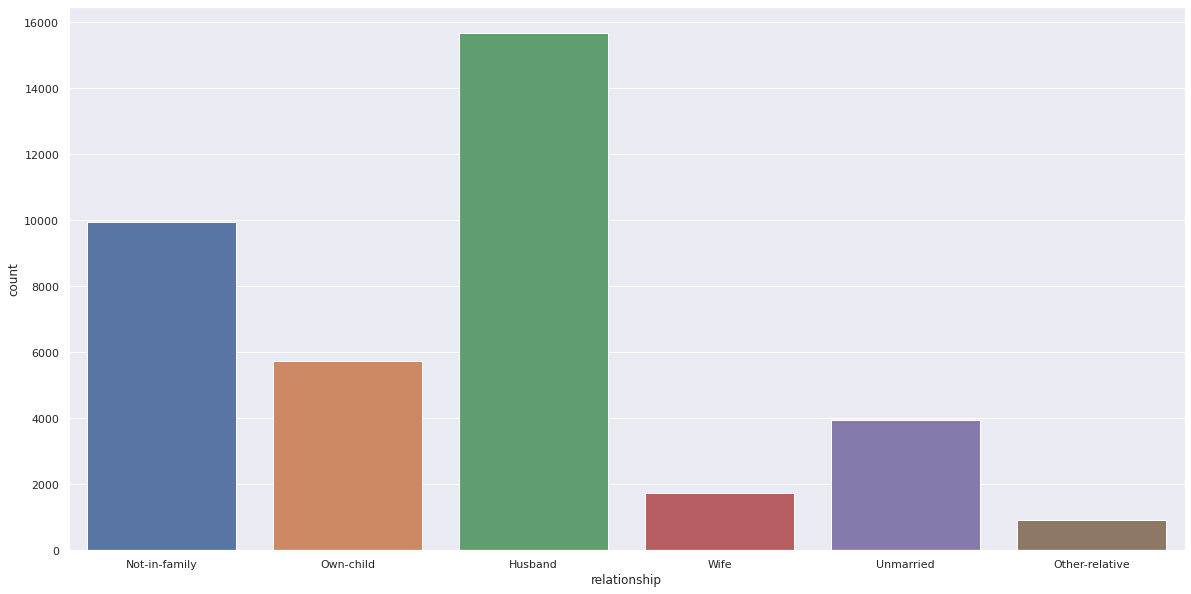

In [23]:
plt.figure(figsize=(20,10)) 
sns.countplot(data= combined_data_df, x = "relationship")

The above graph shows that there are more number of husbands that wives. That means there are possibilities of more males tha females

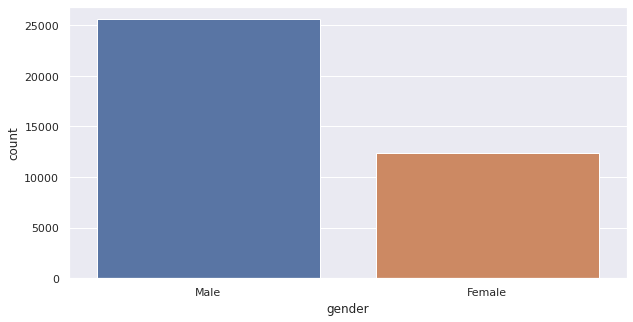

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data= combined_data_df, x = "gender")

Like said there are more males than females.

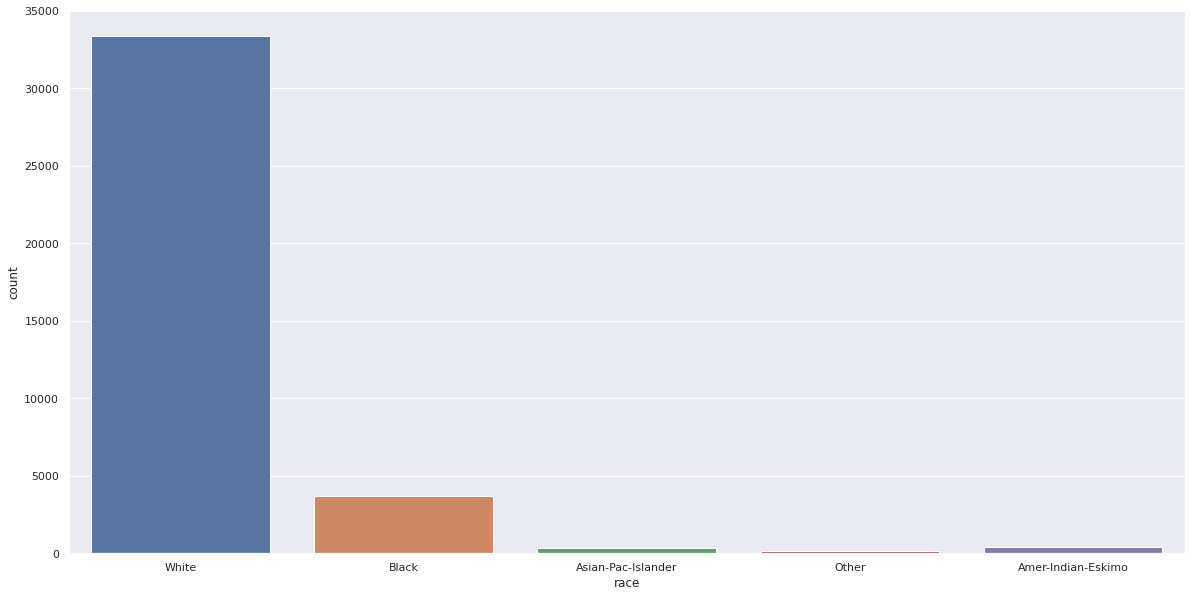

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(data= combined_data_df, x = "race")

There are more whites in this dataset

In [26]:
combined_data_df.shape

(37968, 15)

In [27]:
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37968 entries, 0 to 898
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              37968 non-null  int64  
 1   workclass        37968 non-null  object 
 2   fnlwgt           37968 non-null  int64  
 3   education        37968 non-null  object 
 4   educational-num  37968 non-null  int64  
 5   marital-status   37968 non-null  object 
 6   occupation       37968 non-null  object 
 7   relationship     37968 non-null  object 
 8   race             37968 non-null  object 
 9   gender           37968 non-null  object 
 10  capital-gain     37968 non-null  int64  
 11  capital-loss     37968 non-null  int64  
 12  hours-per-week   37968 non-null  int64  
 13  income_>50K      37149 non-null  float64
 14  label            37968 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 5.9+ MB


**Splitting dataset**

In [28]:
cat_columns = [ col for col in list(combined_data_df.columns) if combined_data_df[col].dtype =='object' and col!= 'label']

cat_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender']

In [29]:
num_columns = [ col for col in list(combined_data_df.columns) if combined_data_df[col].dtype in ['int64','float64']]
num_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_>50K']

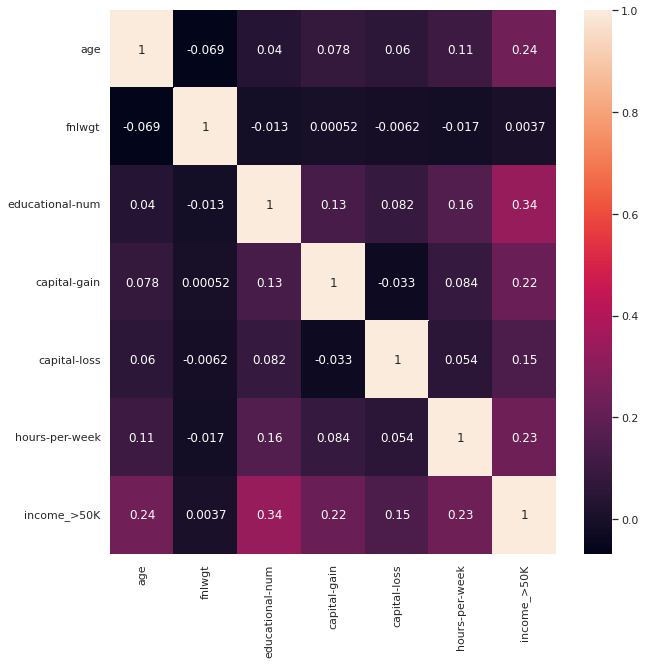

In [30]:
fig= plt.figure(figsize=(10,10))
corr_matrix = combined_data_df.corr()
sns.heatmap(data=corr_matrix,annot=True)
plt.show()


Most of the features have positive correlation with target variable other than fnlwgt. So we will drop that feature

In [31]:
combined_data_df.drop(columns='fnlwgt',inplace=True)
combined_data_df.shape

(37968, 14)

In [32]:
#creating dummy variables#
features_df = pd.get_dummies(data=combined_data_df, columns=cat_columns)
features_df.shape

(37968, 48)

In [33]:
features_df.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K', 'label', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'education_HS-grad', 'education_Preschool',
       'education_elementary-school', 'education_high-school',
       'education_middle-school', 'education_postsecondary-education',
       'marital-status_married', 'marital-status_single',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', '

In [34]:
# Splitting data and droppind lables #
train_df = features_df[features_df['label'] == 'train']
test_df = features_df[features_df['label'] == 'test']

train_df = train_df.drop('label', axis=1)
test_df = test_df.drop(columns=['label','income_>50K'], axis=1)


train_df.shape, test_df.shape


((37149, 47), (819, 46))

In [35]:
train_df.columns

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'education_HS-grad', 'education_Preschool',
       'education_elementary-school', 'education_high-school',
       'education_middle-school', 'education_postsecondary-education',
       'marital-status_married', 'marital-status_single',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Husband', 'relations

In [36]:
train_df.isnull().sum().sum()

0

In [37]:
y=train_df['income_>50K']
train_df=train_df.drop('income_>50K',axis=1)
train_df.shape,y.shape

((37149, 46), (37149,))

In [38]:
from sklearn.model_selection import train_test_split

X = train_df
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1,random_state=10)
X_train.shape, X_test.shape,y_train.shape,y_test.shape


((33434, 46), (3715, 46), (33434,), (3715,))

I choose to do a binary classification. That is 1 if Income> $50k, else 0

Iam creating three models with different parameters. To find the better parameter let us perform Hyper Parameter Tunning

**Using Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print("DecisionTreeClassifier train data's mean accuracy = {} %".format(round((dtc.score(X_train,y_train)*100),2)))
print("DecisionTreeClassifier test data's mean accuracy = {} %".format(round((dtc.score(X_test,y_test)*100),2)))

DecisionTreeClassifier train data's mean accuracy = 96.89 %
DecisionTreeClassifier test data's mean accuracy = 82.66 %


Prediction

In [40]:
from sklearn import metrics

y_pred_dtc= dtc.predict(X_test)
dtc_accuracy = metrics.accuracy_score(y_test,y_pred_dtc)
print("DecisionTreeClassifier model accuracy = {} %".format(round((dtc_accuracy*100),2)))

DecisionTreeClassifier model accuracy = 82.66 %


**Using Random Forest**

In [41]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)

print("RandomForestClassifier train data's mean accuracy = {} %".format(round((rfc.score(X_train,y_train)*100),2)))
print("RandomForestClassifier test data's mean accuracy = {} %".format(round((rfc.score(X_test,y_test)*100),2)))


RandomForestClassifier train data's mean accuracy = 96.89 %
RandomForestClassifier test data's mean accuracy = 85.01 %


**Using Logistic Regressiom**

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
prediction = logreg.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
y_train_predict = logreg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

y_test_predict = logreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 0.43580548666227353


The model performance for testing set
RMSE is 0.42308868772996117


In [46]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test)

score =accuracy_score(y_test,y_pred)
print("Accuracy: ",round(score,2))

Accuracy:  0.82


**CONCLUSION**:

Random Forest model has better Accuracy.

Evaluating the binary output

In [47]:
y_pred = rfc.predict(test_df)

submission_df = pd.DataFrame(columns=['income>50k'])
submission_df['income>50k']=y_pred.astype(int)

In [48]:
submission_df.head()

,income>50k
0,0
1,0
2,0
3,1
4,1
